<a href="https://colab.research.google.com/github/joungminhee/Project/blob/master/%08movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 임포트

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비

In [ ]:
data = '/content/drive/MyDrive/Data/movies_train.csv'
data2 = '/content/drive/MyDrive/Data/movies_test.csv'
data3 = '/content/drive/MyDrive/Data/submission.csv'

In [ ]:
train = pd.read_csv(data)
test = pd.read_csv(data2)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [ ]:
train.shape, test.shape

((600, 12), (243, 11))

In [ ]:
# object의 기술통계량
train.describe(include='object')

,title,distributor,genre,release_time,screening_rat,director
count,600,600,600,600,600,600
unique,600,169,12,330,4,472
top,개들의 전쟁,CJ 엔터테인먼트,드라마,2015-10-22,청소년 관람불가,홍상수
freq,1,54,221,6,204,7


In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
# 감독별로 제작한 횟수
train.director.value_counts()

홍상수           7
장률            4
신재호           4
우민호           4
노진수           4
             ..
권오광           1
한윤선           1
박찬경           1
New Pistol    1
백운학           1
Name: director, Length: 472, dtype: int64

In [ ]:
# 장르별 제작횟수
train.genre.value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

In [ ]:
# 각 관람가연령별 장르별 갯수
train.groupby('screening_rat')['genre'].value_counts()

screening_rat  genre 
12세 관람가        드라마       50
               다큐멘터리     23
               멜로/로맨스    10
               코미디       10
               SF         3
               애니메이션      3
               공포         1
               뮤지컬        1
               액션         1
15세 관람가        드라마       76
               코미디       28
               멜로/로맨스    21
               공포        19
               다큐멘터리     17
               액션        16
               느와르        9
               미스터리       9
               SF         6
               애니메이션      1
전체 관람가         다큐멘터리     52
               드라마       17
               애니메이션     14
               뮤지컬        4
               코미디        3
               SF         1
               멜로/로맨스     1
청소년 관람불가       드라마       78
               멜로/로맨스    46
               공포        22
               느와르       18
               코미디       12
               액션        11
               미스터리       8
               SF         3
               애니메이션      

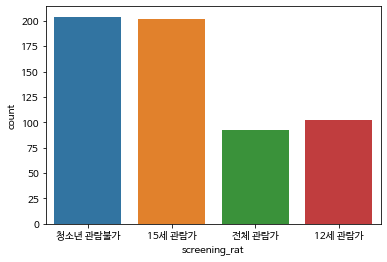

In [ ]:
sns.countplot(x='screening_rat', data=train)
plt.show()

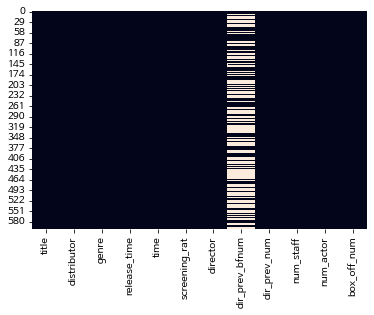

In [ ]:
sns.heatmap(train.isnull(), cbar=False)
plt.show()

# 지영님이 알려주신 Null 시각화 히트맵 적용해봄 :)

In [ ]:
# 각 배급별 제작횟수
train.distributor.value_counts().head()

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
Name: distributor, dtype: int64

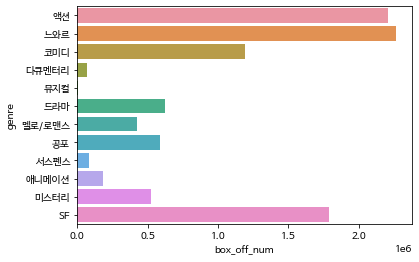

In [ ]:
# 장르별 관람객 수 
sns.barplot(y='genre', x='box_off_num', data=train, ci=None)
plt.show()

In [ ]:
# 상위 10위의 관람객수
top10 = train.sort_values('box_off_num', ascending=False).head(10)
top10

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
372,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,NaN,0,869,4,14262766
362,도둑들,(주)쇼박스,느와르,2012-07-25,135,15세 관람가,최동훈,2.564692e+06,3,462,10,12983841
530,7번방의 선물,(주)NEW,코미디,2013-01-23,127,15세 관람가,이환경,8.190495e+05,2,300,8,12811435
498,암살,(주)쇼박스,액션,2015-07-22,139,15세 관람가,최동훈,5.169479e+06,4,628,3,12706663
460,"광해, 왕이 된 남자",CJ 엔터테인먼트,드라마,2012-09-13,131,15세 관람가,추창민,1.552541e+06,2,402,3,12323595
122,변호인,(주)NEW,드라마,2013-12-18,127,15세 관람가,양우석,NaN,0,311,5,11374879
496,설국열차,CJ 엔터테인먼트,SF,2013-08-01,125,15세 관람가,봉준호,NaN,0,67,10,9350351
101,관상,(주)쇼박스,드라마,2013-09-11,139,15세 관람가,한재림,1.242778e+06,2,298,6,9135806
505,해적: 바다로 간 산적,롯데엔터테인먼트,SF,2014-08-06,130,12세 관람가,이석훈,1.843895e+06,3,868,2,8666208
476,수상한 그녀,CJ 엔터테인먼트,코미디,2014-01-22,124,15세 관람가,황동혁,2.781990e+06,2,437,5,8659725


In [ ]:
# 상위 10개의 배급별 제작횟수
top10.distributor.value_counts()

CJ 엔터테인먼트    4
(주)쇼박스       3
(주)NEW       2
롯데엔터테인먼트     1
Name: distributor, dtype: int64

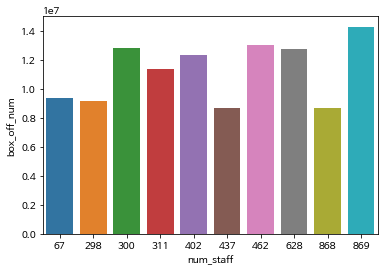

In [ ]:
# 상위 10개의 스태프별 관람객 수 
sns.barplot(x='num_staff' , y='box_off_num', data=top10)
plt.show()

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 코렙에서 한글 깨짐 현상 있을때 설치 후 밑코드로 해결완료
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
train.distributor.unique()
# 많아서 전처리 때 컬럼 삭제할 예정

array(['롯데엔터테인먼트', '(주)쇼박스', '(주)NEW', '쇼박스(주)미디어플렉스', '백두대간',
       '유니버설픽쳐스인터내셔널코리아', '(주)두타연', '(주) 케이알씨지', '(주)콘텐츠 윙', '(주)키노아이',
       '(주)팝 파트너스', 'CJ E&M 영화부문', '(주) 영화제작전원사', 'CJ E&M Pictures',
       'CGV 무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ 엔터테인먼트', 'CGV아트하우스', '조이앤시네마',
       '인디플러그', '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네',
       '영화사 진진', '(주)레인보우 팩토리', '김기덕 필름', 'NEW', 'CJ CGV',
       '동국대학교 충무로영상제작센터', 'BoXoo 엔터테인먼트', '(주)마운틴픽쳐스', 'CGV 아트하우스',
       '메가박스(주)플러스엠', '골든타이드픽처스', '파이오니아21', '디 씨드', '드림팩트 엔터테인먼트', '시너지',
       '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아', '(주)예지림 엔터테인먼트', '(주) 영화사조제',
       '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트', '(주)패스파인더씨앤씨', '(주)대명문화공장',
       '(주)온비즈넷', 'KT&G 상상마당', '무비꼴라쥬', '인벤트 디', '씨네그루(주)키다리이엔티',
       '스튜디오후크', '시네마 달', '나이너스엔터테인먼트(주)', 'THE 픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션 픽처스', '(주)이스트스카이필름', '필라멘트 픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴 픽처스', '(주)휘엔터테인먼트', '이십세기폭스코리아(주)', '(주)피터팬픽쳐스', '에스와이코마드',
       '(주)더픽쳐스', '오퍼스픽쳐스'

# 데이터 전처리

In [ ]:
train.dir_prev_bfnum.fillna(0).mean() 
# 결측치를 평균으로 대체하면 값이 너무 클것같아, 0으로 대체하고 평균을 냄

472699.30113888887

In [ ]:
train.dir_prev_bfnum.mean()

1050442.8914197532

In [ ]:
train = train.fillna(0)
test = test.fillna(0)

In [ ]:
train.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [ ]:
test.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
dtype: int64

In [ ]:
# 필요없는 columns 제거
train = train.drop(columns=['title','distributor','director'])
test = test.drop(columns=['title', 'distributor','director'])

In [ ]:
# 장르별 라벨인코딩
from sklearn.preprocessing import LabelEncoder
cols = ['genre','screening_rat']
for col in cols:
    le = LabelEncoder() #모델생성
    train[col] = le.fit_transform(train[col])
    test[col]= le.transform(test[col])

In [ ]:
train.head()

,genre,release_time,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,10,2012-11-22,96,3,0.00,0,91,2,23398
1,2,2015-11-19,130,3,1161602.50,2,387,3,7072501
2,10,2013-06-05,123,1,220775.25,4,343,4,6959083
3,11,2012-07-12,101,2,23894.00,2,20,6,217866
4,11,2010-11-04,108,1,1.00,1,251,2,483387


In [ ]:
train.screening_rat.value_counts()

# 청소년 관람불가 3
# 15세 관람가 1
# 12세 관람가 0
# 전체 관람가 2

3    204
1    202
0    102
2     92
Name: screening_rat, dtype: int64

In [ ]:
train.genre.value_counts()
# 드라마       221
# 다큐멘터리      93
# 멜로/로맨스     78
# 코미디        53
# 공포         42
# 액션         28
# 느와르        27
# 애니메이션      21
# 미스터리       17
# SF         13
# 뮤지컬         5
# 서스펜스        2

4     221
3      93
5      78
11     53
1      42
10     28
2      27
9      21
7      17
0      13
6       5
8       2
Name: genre, dtype: int64

In [ ]:
train.head()

,genre,release_time,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,10,2012-11-22,96,3,0.00,0,91,2,23398
1,2,2015-11-19,130,3,1161602.50,2,387,3,7072501
2,10,2013-06-05,123,1,220775.25,4,343,4,6959083
3,11,2012-07-12,101,2,23894.00,2,20,6,217866
4,11,2010-11-04,108,1,1.00,1,251,2,483387


# 데이터 모델링